<div class="markdown-google-sans">
  <h2>CS/CE 457/464 - Homework Assignment 2: Exploratory Data
Analysis (EDA) </h2>
</div>

## Name: Muhammad Areeb Kazmi

## Email: mk07202@st.habib.edu.pk
i
Date: 9 September, 2024


Importing libraries for the notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Part 1 Solution Attempt

In [4]:
df = pd.read_csv('FIFA_Players_Data.csv')
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9


We have used the mode for impitation in these columns because it is suitable for categorical data and preserves the distribution.

In [5]:
remaining_columns = ['joined', 'nation_position', 'nation_jersey_number', 'team_position', 'team_jersey_number']

for column in remaining_columns:
    df.fillna({column: df[column].mode()[0]}, inplace=True)

I considered dropping the GK rows as a better choice in these columns since the inconsistent data will be deleted, thus ensuring data integrity by having focus on rows with consistent attributes.

In [6]:
df = df[df["nation_position"] != "GK"]

I also dropped the release_clause_eur column since it is empty.

In [7]:
df = df.drop(['release_clause_eur'], axis = 1)

Here, I have processed the values by splitting the strings and then converting them to the relevant integer data types and calculating the final value.

In [8]:
def process_value(value):
    """Processes a value with a '+' or '-' sign and returns a numerical value."""
    if isinstance(value, str):
        if '+' in value:
            parts = value.split("+")
            return int(parts[0]) + int(parts[1])
        elif '-' in value:
            parts = value.split("-")
            return int(parts[0]) - int(parts[1])
    return int(value)  # Convert to int if it is already a number

# Apply the function to both columns and convert them to int in a single step
for column in ["power_stamina", "skill_ball_control"]:
    df[column] = df[column].apply(process_value).astype(int)


Finally, we export the cleaned CSV file to show our results.

In [9]:
df.to_csv('FIFA_Players_Cleaned_Data.csv', index = False) #exporting the CSV file

# Part 2 Solution Attempt

Importing and reading the Cleaned CSV file

In [ ]:
df = pd.read_csv('FIFA_Players_Cleaned_Data.csv')
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,76
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,89,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,91,89
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1/24/1987,181,81,Uruguay,FC Barcelona,89,...,SUB,1.0,83.0,87.0,79.0,88.0,42.0,79.0,89,86


Grouping the data for each team position to show the combined stats and give a proper summary table using pandas for player attributes in terms of pace, stamina, etc.

In [ ]:
df.groupby('team_position')[['skill_ball_control', 'power_stamina', 'pace']].describe(include = 'all')

skill_ball_control                                           \
                           count       mean        std   min    25%   50%   
team_position                                                               
CAM                        278.0  71.075540   8.292360  47.0  66.00  72.0   
CB                          42.0  55.952381   9.588999  38.0  49.00  54.5   
CDM                        121.0  68.157025   8.248240  40.0  63.00  68.0   
CF                           9.0  80.222222  12.060035  63.0  70.00  84.0   
CM                          56.0  67.964286   7.922268  50.0  62.75  68.0   
GK                         526.0  25.055133   4.210509  14.0  22.00  25.0   
LAM                         19.0  69.684211   7.242257  56.0  65.00  67.0   
LB                         509.0  62.966601   9.285120  28.0  59.00  63.0   
LCB                        552.0  54.599638   9.668415  26.0  48.00  55.0   
LCM                        317.0  68.624606   7.429910  40.0  64.00  68.0   
LDM                        219.0  67.643836   7.294028  49.0  63.00  68.0   
LF                           5.0  69.400000   2.408319  66.0  68.00  70.0   
LM                         383.0  68.221932   7.874363  40.0  64.00  68.0   
LS                         195.0  66.605128   7.289519  45.0  62.00  66.0   
LW                         107.0  72.345794   7.092519  59.0  67.50  71.0   
LWB                         18.0  57.888889  10.028717  29.0  54.25  59.0   
RAM                         19.0  69.578947   8.546057  50.0  64.00  71.0   
RB                         506.0  62.009881   9.159203  28.0  56.00  63.0   
RCB                        554.0  54.216606   9.833148  22.0  48.00  55.0   
RCM                        321.0  68.707165   7.640859  43.0  64.00  69.0   
RDM                        223.0  66.529148   8.025175  29.0  62.00  66.0   
RES                       2581.0  51.073227  15.203391   9.0  42.00  55.0   
RF                           5.0  74.600000   9.423375  66.0  66.00  72.0   
RM                         383.0  68.093995   7.695211  48.0  63.00  68.0   
RS                         195.0  66.569231   7.934596  45.0  61.00  67.0   
RW                         105.0  71.628571   6.902142  58.0  67.00  71.0   
RWB                         18.0  59.888889  10.436863  42.0  51.00  62.0   
ST                         354.0  67.050847   7.720156  44.0  62.00  67.0   
SUB                       6575.0  57.794677  15.325853  -1.0  52.00  61.0   

                           power_stamina             ...                \
                 75%   max         count       mean  ...    75%    max   
team_position                                        ...                 
CAM            76.00  93.0         278.0  68.453237  ...  76.00   99.0   
CB             64.00  77.0          42.0  63.238095  ...  68.75   88.0   
CDM            74.00  84.0         121.0  75.950413  ...  85.00  124.0   
CF             90.00  96.0           9.0  69.777778  ...  77.00   80.0   
CM             73.00  90.0          56.0  72.178571  ...  80.25  104.0   
GK             26.00  65.0         526.0  32.661597  ...  38.00   82.0   
LAM            73.50  86.0          19.0  72.789474  ...  78.50   92.0   
LB             69.00  89.0         509.0  75.473477  ...  82.00  102.0   
LCB            61.00  89.0         552.0  65.619565  ...  73.25   98.0   
LCM            74.00  94.0         317.0  75.145110  ...  82.00  112.0   
LDM            72.00  87.0         219.0  75.753425  ...  82.50  109.0   
LF             71.00  72.0           5.0  67.200000  ...  84.00   85.0   
LM             74.00  89.0         383.0  70.746736  ...  77.00  104.0   
LS             71.00  88.0         195.0  69.569231  ...  77.00  105.0   
LW             77.00  91.0         107.0  69.682243  ...  75.50   99.0   
LWB            64.75  69.0          18.0  72.555556  ...  76.75   90.0   
RAM            74.00  86.0          19.0  71.894737  ...  81.00   91.0   
RB             68.00  85.0         506.0  75.166008  ...  82.00  123.

Now Grouping the data for each team position to show the combined stats and give a proper summary table using pandas for player attributes in terms of age, weight, height, etc. This shows that the heights of a Center Back are mostly the biggest in general. Center forwards, center backs, and GKs, tend to play for the longest age. GKs also tend to be the heaviest in weight.

In [ ]:
df.groupby('team_position')[['age', 'height_cm', 'weight_kg']].describe(include = 'all')

age                                                       \
                count       mean       std   min    25%   50%    75%   max   
team_position                                                                
CAM             278.0  25.953237  4.445576  17.0  22.00  26.0  29.00  41.0   
CB               42.0  28.547619  4.232294  19.0  25.00  29.5  32.00  36.0   
CDM             121.0  27.123967  3.839640  19.0  24.00  27.0  30.00  37.0   
CF                9.0  28.777778  3.597839  25.0  27.00  28.0  30.00  37.0   
CM               56.0  26.535714  4.812727  17.0  23.00  27.0  29.00  38.0   
GK              526.0  27.699620  4.478635  19.0  24.00  27.0  31.00  44.0   
LAM              19.0  26.789474  3.866939  21.0  23.50  26.0  28.50  35.0   
LB              509.0  25.817289  3.833649  17.0  23.00  26.0  28.00  37.0   
LCB             552.0  26.856884  4.170089  18.0  24.00  27.0  30.00  38.0   
LCM             317.0  26.280757  4.330497  17.0  23.00  26.0  29.00  38.0   
LDM             219.0  26.461187  4.242868  18.0  23.00  26.0  29.00  39.0   
LF                5.0  26.200000  4.207137  22.0  23.00  25.0  29.00  32.0   
LM              383.0  25.190601  3.713949  17.0  23.00  25.0  27.00  36.0   
LS              195.0  26.338462  4.051003  19.0  23.00  26.0  29.00  37.0   
LW              107.0  24.915888  3.752035  19.0  22.00  25.0  27.00  34.0   
LWB              18.0  25.444444  4.668067  18.0  20.75  26.0  28.75  34.0   
RAM              19.0  26.105263  4.108186  20.0  23.50  26.0  28.00  38.0   
RB              506.0  25.584980  3.792344  17.0  23.00  25.5  28.00  35.0   
RCB             554.0  26.638989  4.204922  17.0  23.00  27.0  30.00  37.0   
RCM             321.0  26.295950  4.321778  17.0  23.00  26.0  29.00  37.0   
RDM             223.0  25.964126  3.842457  18.0  23.00  26.0  28.50  37.0   
RES            2581.0  21.304533  3.872315  16.0  19.00  20.0  23.00  44.0   
RF                5.0  28.800000  2.863564  25.0  27.00  29.0  31.00  32.0   
RM              383.0  25.420366  3.827197  17.0  22.00  25.0  28.00  38.0   
RS              195.0  26.471795  4.162049  18.0  23.00  26.0  30.00  36.0   
RW              105.0  25.066667  3.971695  17.0  22.00  25.0  27.00  35.0   
RWB              18.0  24.111111  3.562697  17.0  22.00  24.5  27.00  30.0   
ST              354.0  26.262712  3.891797  18.0  23.00  26.0  29.00  40.0   
SUB            6575.0  24.638935  4.566729  16.0  21.00  24.0  28.00  44.0   

              height_cm              ...                weight_kg             \
                  count        mean  ...     75%    max     count       mean   
team_position                        ...                                       
CAM               278.0  177.521583  ...  182.00  193.0     278.0  72.183453   
CB                 42.0  184.523810  ...  188.00  197.0      42.0  79.357143   
CDM               121.0  181.016529  ...  185.00  196.0     121.0  75.264463   
CF                  9.0  177.888889  ...  182.00  187.0       9.0  74.777778   
CM                 56.0  179.357143  ...  183.00  191.0      56.0  74.696429   
GK                526.0  188.083650  ...  191.00  201.0     526.0  83.313688   
LAM                19.0  174.421053  ...  178.00  183.0      19.0  69.947368   
LB                509.0  178.984283  ...  183.00  196.0     509.0  73.895874   
LCB               552.0  186.077899  ...  190.00  201.0     552.0  80.327899   
LCM               317.0  178.981073  ...  183.00  192.0     317.0  73.507886   
LDM               219.0  180.762557  ...  185.00  194.0     219.0  75.063927   
LF                  5.0  180.000000  ...  182.00  186.0       5.0  76.000000   
LM                383.0  177.114883  ...  181.00  194.0     383.0  72.389034   
LS                195.0  181.123077  ...  185.00  198.0     195.0  77.041026   
LW                107.0  176.579439  ...  180.00  192.0     107.0  71.598131   
LWB                18.0  176.111111  ...  181.50  186.0      18.0  71.944444   
R

For displaying the bar chart, I used the player nationality to see which country had the most and the least players in our data. While most players were from Europe, England to be precise, we see that Chile, USA, and Mexico had the least amount of players.

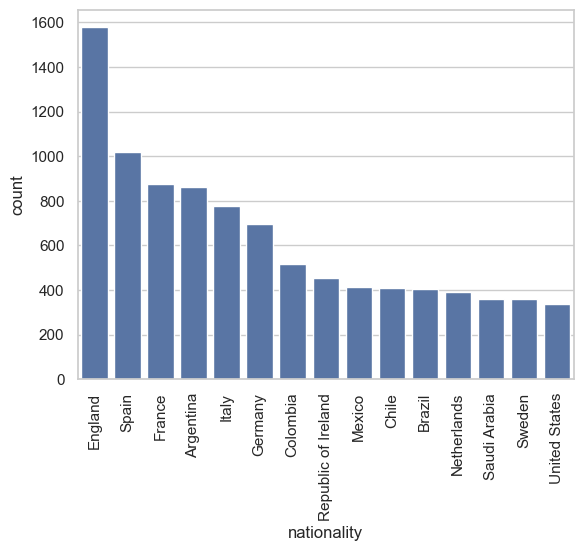

In [ ]:
ax = sns.countplot(x ='nationality', data = df, order=df['nationality'].value_counts()[:15].index)
ax.tick_params(axis='x', rotation=90)

Making the histogram for age to show how many players belong to what age group. Most players were in their late teenage years and between the prime years of a football from 20 to 28 years. There were many players at the age of 30 but then the number declined since most footballers retire by age of 33-34

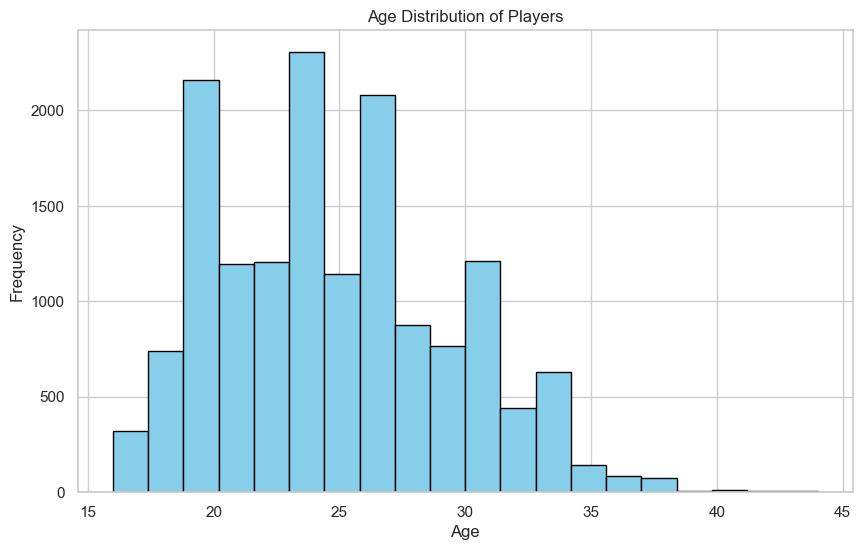

In [ ]:
# Histogram for 'age' distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


For the scatterplot (continuous vs continuous), There is a strong positive linear relationship between "Overall" and "Potential" ratings of players. This suggests that players with a higher overall rating also tend to have a high potential rating.

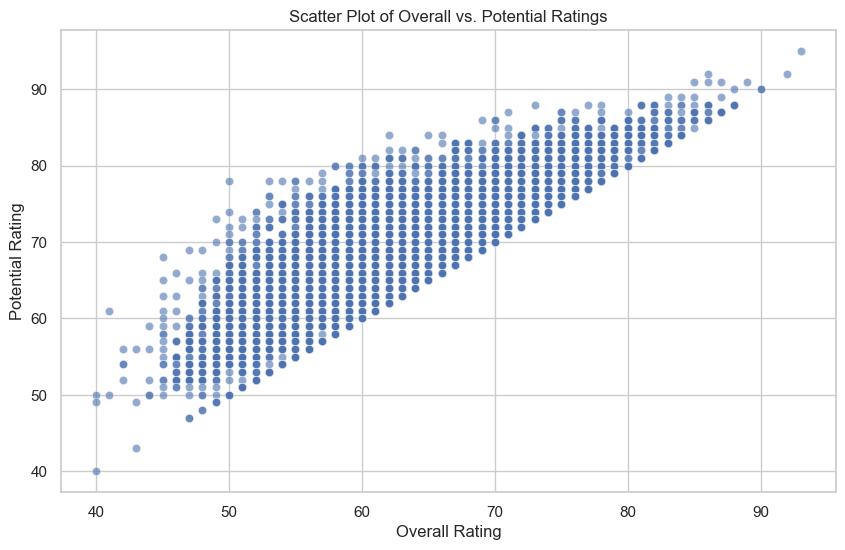

In [ ]:
# Scatter Plot: "Overall" vs. "Potential"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overall', y='potential', data=df, alpha=0.6)
plt.title('Scatter Plot of Overall vs. Potential Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.show()

In the bar graph below, for discreet and continuous, we first take the top 10 countries with most players, then we filter them out, and compute overall ratings for each group.

Thus we have this overall rating where we see, that Spain and Argentina have the highest overall ratings, and Ireland and England had the least

C:\Users\mlibr\AppData\Local\Temp\ipykernel_13684\1268245746.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overall', y='nationality', data=mean_overall_nationality, palette='Set3')


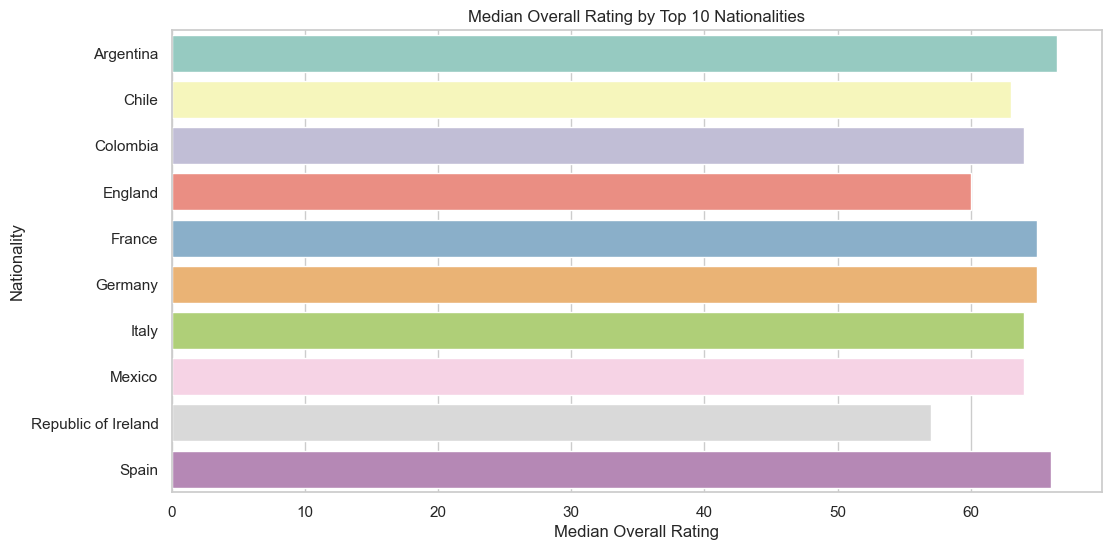

In [ ]:

# Select the top 10 nationalities by the number of players
top_nationalities = df['nationality'].value_counts().nlargest(10).index

# Filter the df to include only the top 10 nationalities
filtered_data = df[df['nationality'].isin(top_nationalities)]

# Calculate the mean "Overall" rating for each nationality
mean_overall_nationality = filtered_data.groupby('nationality')['overall'].median().reset_index()

# Bar Plot: Mean "Overall" by "Nationality"
plt.figure(figsize=(12, 6))
sns.barplot(x='overall', y='nationality', data=mean_overall_nationality, palette='Set3')
plt.title('Median Overall Rating by Top 10 Nationalities')
plt.xlabel('Median Overall Rating')
plt.ylabel('Nationality')
plt.show()

The correlation plot shows certain strong positive correlations between certain attributes:
- "Passing" and "Dribbling" (0.80): Players who are good at dribbling also tend to have good passing skills.
- "Physic" and "Defending" (0.67): Players with good physicality often excel at defending.

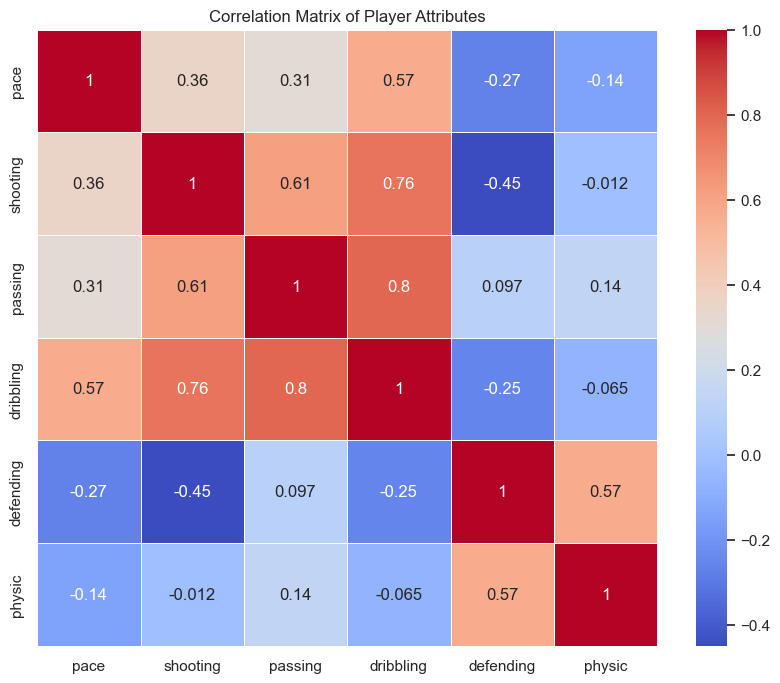

In [ ]:
# Select continuous columns for correlation analysis
continuous_columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Calculate the correlation matrix
correlation_matrix = df[continuous_columns].corr()

# Correlation Plot (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Player Attributes')
plt.show()

This part here has the one Multivariate visualization (more than two variables). While it is difficult to tell the exact trends, we see a relation between potential and overall along with overall and shooting. Other figures are a bit difficult to analyze

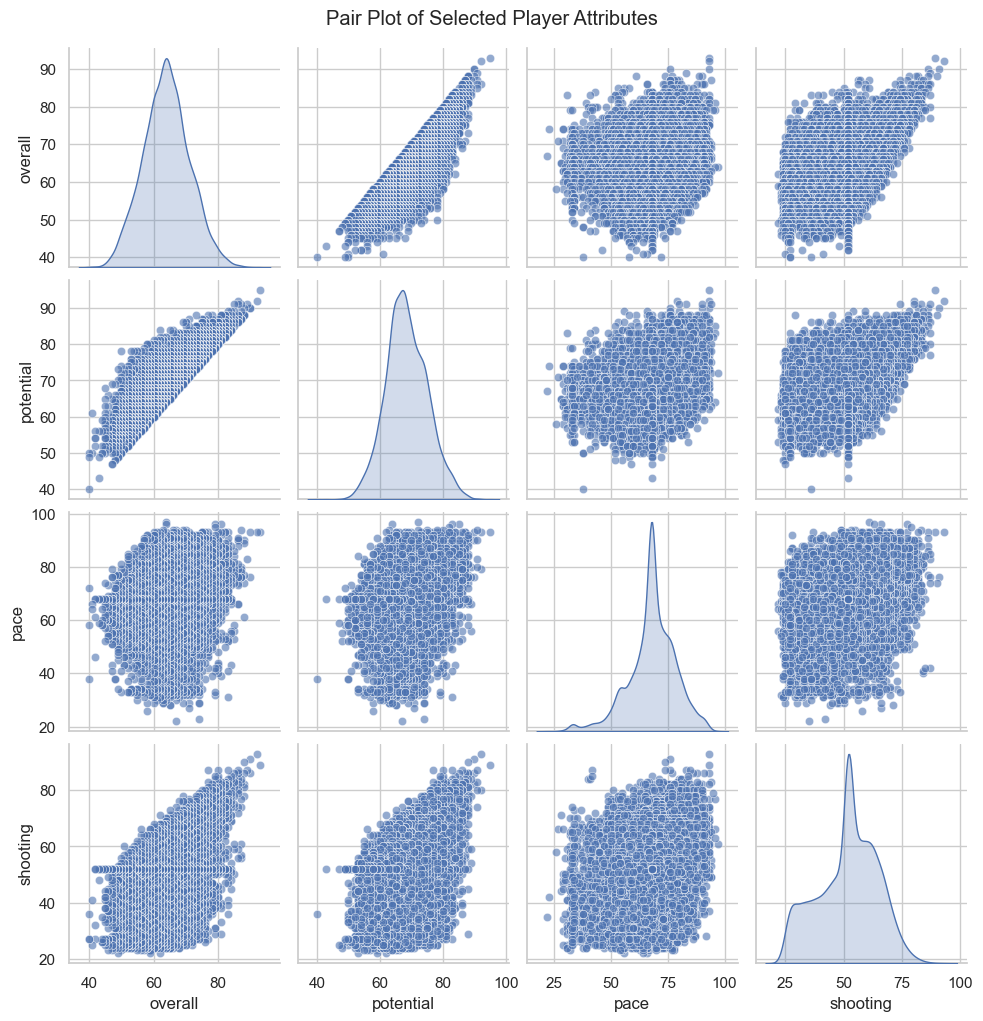

In [ ]:
selected_attributes = ['overall', 'potential', 'pace', 'shooting']

# Generate the pair plot
pair_plot = sns.pairplot(df[selected_attributes], diag_kind='kde', plot_kws={'alpha': 0.6})

# Add a title to the entire plot
pair_plot.fig.suptitle('Pair Plot of Selected Player Attributes', y=1.02)

# Show the plot
plt.show()